In [91]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(str(Path.cwd().parent))

In [46]:
from src.bks_api_func import authorize, get_token_from_txt_file, get_candles
access_token = authorize(get_token_from_txt_file())
option_candles = get_candles(access_token, "SR300CB6", "2026-02-01", "2026-02-11", "OPTSPOT", "H1")
stock_candles = get_candles(access_token, "SBER", "2026-02-01", "2026-02-11", "TQBR", "H1")

In [92]:
option_df = pd.DataFrame(option_candles)
option_df['time'] = pd.to_datetime(option_df['time'])
option_df = option_df.set_index('time')

stock_df = pd.DataFrame(stock_candles)
stock_df['time'] = pd.to_datetime(stock_df['time'])
stock_df = stock_df.set_index('time')

df = pd.concat([stock_df.add_suffix("_stock"), option_df.add_suffix("_option")], axis=1, sort=False).drop_duplicates()
df.info()

<class 'pandas.DataFrame'>
DatetimeIndex: 156 entries, 2026-02-10 20:00:00+00:00 to 2026-02-01 06:00:00+00:00
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   open_stock     156 non-null    float64
 1   close_stock    156 non-null    float64
 2   high_stock     156 non-null    float64
 3   low_stock      156 non-null    float64
 4   volume_stock   156 non-null    float64
 5   open_option    86 non-null     float64
 6   close_option   86 non-null     float64
 7   high_option    86 non-null     float64
 8   low_option     86 non-null     float64
 9   volume_option  86 non-null     float64
dtypes: float64(10)
memory usage: 13.4 KB


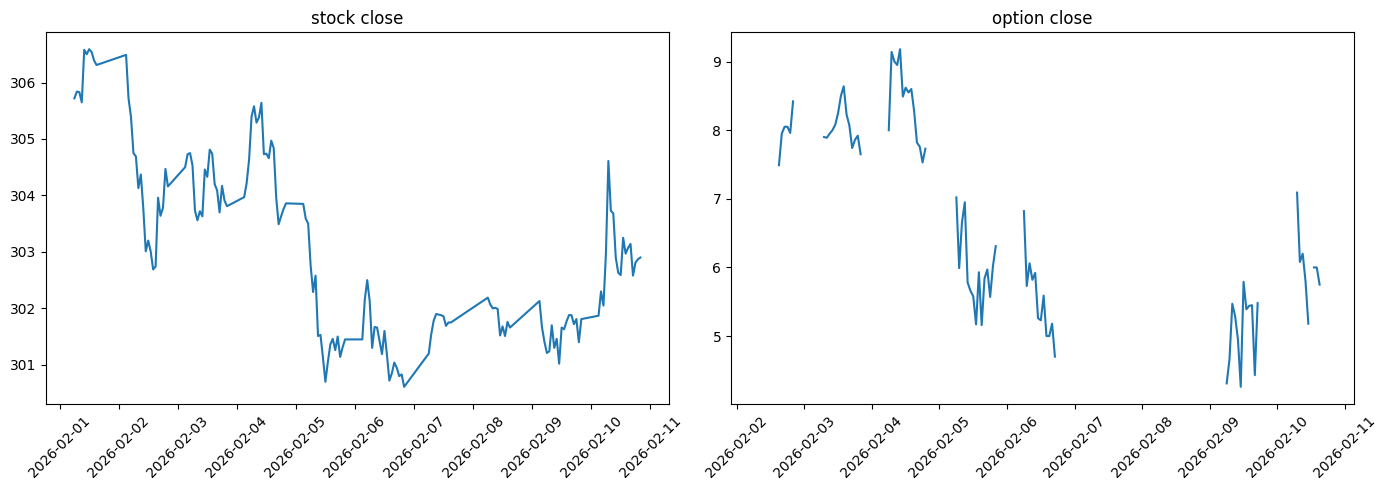

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

ax1.plot(df.index, df['close_stock'])
ax1.set_title('stock close')
ax1.tick_params(axis='x', rotation=45)

# график опциона
ax2.plot(df.index, df['close_option'])
ax2.set_title('option close')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()  
plt.show()
